# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 8: *RegionDescriptors*
Compute basic region descriptors of a shape in an image
***  

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Module functions
from ImageUtilities import imageReadL, plotImageL
from PrintUtilities import printText
from ImageRegionsUtilities import findLongesSegmentinImage

# Math and iteration
from math import pi, sqrt
from timeit import itertools

### Parameters:
    pathToDir = Input image directory
    imageName = Input image name
    gaussianKernelSize = Gaussian kernel size. Filter noise
    sobelKernelSize = Sobel kernel size. Edge detection
    upperT = Upper threshold
    lowerT = Lower threshold

In [2]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter8/Input/")
imageName = "ConvShape.png"
gaussianKernelSize = 5
sobelKernelSize = 3
upperT = 0.3
lowerT = 0.05

### Show input image

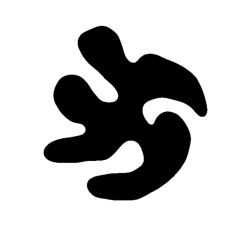

In [3]:
inputImage, width, height = imageReadL(pathToDir+imageName)
plotImageL(inputImage, figureSize = 3)

### Area. Assume the image with pixel value different to zero define the regions

In [4]:
area = 0
for x,y in itertools.product(range(0, width), range(0, height)):
        if inputImage[y,x] != 0 : 
            area += 1

### Obtain shape contour

In [5]:
shape, width, height = findLongesSegmentinImage(pathToDir + imageName,   \
                                                 gaussianKernelSize, sobelKernelSize, upperT, lowerT)

### Perimeter and mean. The mean is the contour centre. The perimeter is the arc length

In [6]:
numPoints = len(shape[0]) 
mean = [0,0]
perimeter = 0.0
y0, x0 = shape[0, numPoints-1], shape[1, numPoints-1]
for p in range(0, numPoints):
    y,x = shape[0,p], shape[1,p]
    mean[0], mean[1] =  mean[0]+x, mean[1]+y
    perimeter += sqrt((y-y0)*(y-y0) + (x-x0)*(x-x0))
    y0,x0 = y,x
mean[0],mean[1] = mean[0]/numPoints, mean[1]/numPoints  

### Compactness 

In [7]:
compactness = 4.0*pi*area/(perimeter*perimeter);

### Dispersion

In [8]:
maxDist, minDist = 0, float('Inf')
for p in range(0, numPoints):
    y,x = shape[0,p], shape[1,p]
    d = sqrt((x-mean[0])**2 + (y-mean[1])**2)
    if d >maxDist:  
        maxDist = d 
    if d <minDist:  
        minDist = d 
        
dispersion = pi*maxDist*maxDist/area
dispertionRatio = sqrt(maxDist/minDist)

### Print results

In [9]:
printText("Area = " + str(area))
printText("Mean = " + '%.2f' % mean[0] + ", " + '%.2f' % mean[1])
printText("Perimeter = " + '%.2f' % perimeter)
printText("Compactness = " + '%.2f' % compactness)
printText("Dispertion = " + '%.2f' % dispersion)
printText("DispertionRatio = " + '%.2f' % dispertionRatio)

Area = 245635
Mean = 303.15, 288.87
Perimeter = 2587.24
Compactness = 0.46
Dispertion = 0.82
DispertionRatio = 2.26
